<h1 style="color: red; text-align: center;">Breast Cancer, Model</h1>
<h2 style="color: blue; text-align: center;">National School of Applied Science</h2>
<h3 style="color: green; text-align: center;">Supervisor:  Pr.Hayat ROUTAIB</h3>
<hr width: 5px>
<h3>❖ Authors:</h3>
<p>TATI Mohammed<br>JALILI Badr Eddine</p>
<p style="text-align: right;"><b>07-DEC | <span style="color: green;">2022</span></b></p> 

## Importing the data

In [1]:
import pandas as pd
file = 'model_data.csv'

data = pd.read_csv(file)
data.tail()

,diagnosis,Radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
564,1,21.56,142.00,1479.0,0.24390,0.13890,25.450,166.10,2027.0,0.4107,0.2216
565,1,20.13,131.20,1261.0,0.14400,0.09791,23.690,155.00,1731.0,0.3215,0.1628
566,1,16.60,108.30,858.1,0.09251,0.05302,18.980,126.70,1124.0,0.3403,0.1418
567,1,20.60,140.10,1265.0,0.35140,0.15200,25.740,184.60,1821.0,0.9387,0.2650
568,0,7.76,47.92,181.0,0.00000,0.00000,9.456,59.16,268.6,0.0000,0.0000


## Split data

In [2]:
import numpy as np

In [3]:
X = data[data.columns[1:]]
X.shape

(569, 10)

In [4]:
y = data['diagnosis']
y.shape

(569,)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

- Logistic Regression
k-Nearest Neighbors
Decision Trees
Support Vector Machine
Naive Bayes

- RandomForestClassifier

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import roc_auc_score

In [7]:
algos = [
    RandomForestClassifier(random_state=2),
    GaussianNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    LogisticRegression()
]

df = {"Model": [], "Roc_Auc Score": [], "Score":[]}
for algo in algos:
    model = algo.fit(X_train, y_train)
    y_pred = algo.predict_proba(X_test)[:, 1]
    df["Model"].append(str(algo)[:str(algo).find('(')])
    df["Roc_Auc Score"].append(roc_auc_score(y_test, y_pred))
    df['Score'].append(algo.score(X_test, y_test))

models = pd.DataFrame(df)

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
models

,Model,Roc_Auc Score,Score
0,RandomForestClassifier,0.992433,0.941520
1,GaussianNB,0.990466,0.941520
2,DecisionTreeClassifier,0.912984,0.912281
3,KNeighborsClassifier,0.981462,0.947368
4,LogisticRegression,0.996822,0.970760


In [9]:
DeepnoteChart(models, """{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"title":"Models"},"sort":null,"type":"nominal","field":"Model","scale":{"type":"linear"}},"y":{"axis":{"title":"Roc_Auc Score"},"sort":null,"type":"quantitative","field":"Roc_Auc Score","scale":{"type":"linear"},"aggregate":"sum"},"color":{"datum":"Sum of Roc_Auc Score"},"xOffset":{"datum":"Sum of Roc_Auc Score"}}},{"mark":{"clip":true,"type":"bar","color":"#f58518","tooltip":true},"encoding":{"x":{"sort":null,"type":"nominal","field":"Model","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","field":"Score","scale":{"type":"linear"},"aggregate":"sum"},"color":{"datum":"Sum of Score"},"xOffset":{"datum":"Sum of Score"}}}],"title":"Models statistics","config":{"legend":{"orient":"bottom"}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","resolve":{"scale":{"y":"independent"}},"encoding":{}}""")

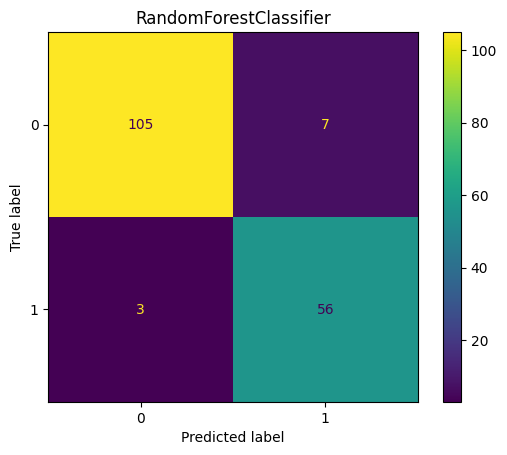

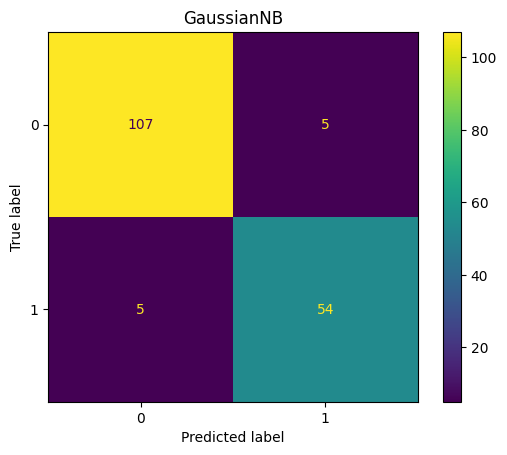

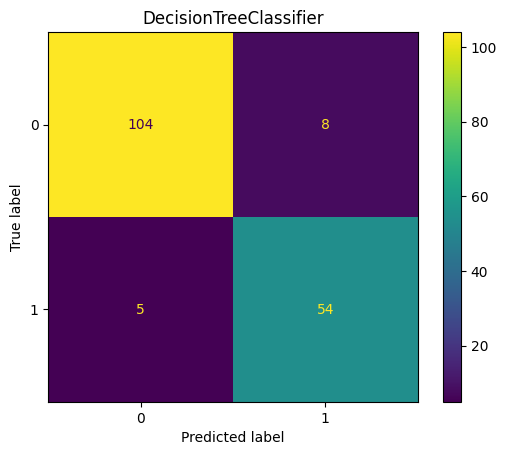

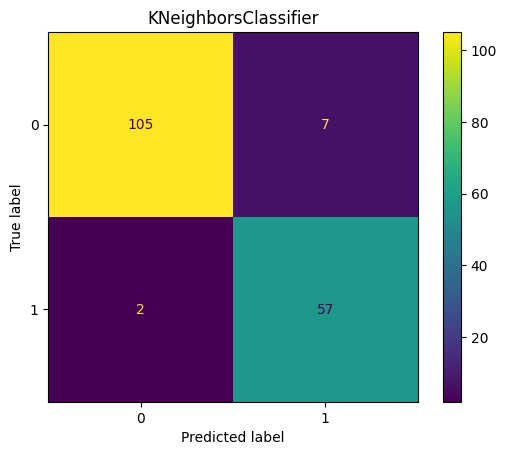

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


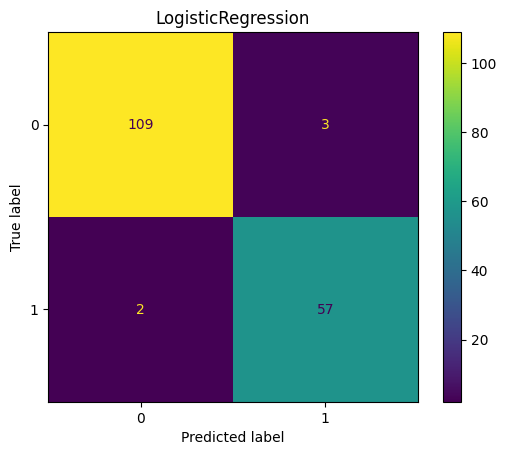

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

for algo in algos:
    algo.fit(X_train, y_train)

    y = algo.predict_proba(X_test)
    y_pred = []
    for l in y:
        if l[0] > l[1]:
            y_pred.append(0)
        else:
            y_pred.append(1)
    cm = confusion_matrix(y_test,y_pred)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    plt.title(str(algo)[:str(algo).find('(')])
    plt.show()

as a result of the comparaison of (TP, TN, FP, FN) it's abvous that the optimal model is Logistic Regression.

## The selected model: LogisticRegression

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Score
model.score(X_test, y_test)


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9707602339181286

## Model deployment

In [12]:
import pickle

with open('Breast Cancer LR.pickle', 'wb') as f:
    pickle.dump(model, f)

<hr>
<p style="text-align: right">Breast Cancer, Model | <span style="color: green">Successfuly Completed</span></p>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9bbe9ee2-d8a7-4805-9f8f-4e89f150f368' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>